In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))


Using TensorFlow backend.


Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 103us/step - loss: 1.1650 - acc: 0.7184 - val_loss: 0.6754 - val_acc: 0.8296
Epoch 2/5
18000/18000 [==============================] - 2s 93us/step - loss: 0.5312 - acc: 0.8641 - val_loss: 0.4883 - val_acc: 0.8699
Epoch 3/5
18000/18000 [==============================] - 2s 84us/step - loss: 0.4221 - acc: 0.8839 - val_loss: 0.4212 - val_acc: 0.8857
Epoch 4/5
18000/18000 [==============================] - 2s 89us/step - loss: 0.3738 - acc: 0.8979 - val_loss: 0.3843 - val_acc: 0.8935
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step

loss_and_metrics : [0.33802563573122024, 0.9044]
True : 4, Predict : 4
True : 0, Predict : 0
True : 9, Predict : 9
True : 3, Predict : 3
True : 0, Predict : 0


## Learn & Evaluate

In [2]:
## Save both architecture & Weight in h5 file extension
from keras.models import load_model

model.save('mnist_mlp_model.h5')


## Visualize the architecture

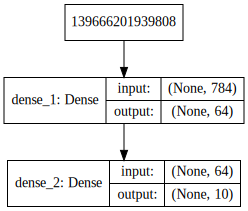

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


## Load the Arch.

In [9]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))


True : 1, Predict : 1
True : 8, Predict : 8
True : 2, Predict : 2
True : 5, Predict : 5
True : 7, Predict : 7


## Seprate Save option - arch / weight

In [13]:
from keras.models import model_from_json
json_string = model.to_json() # 모델 아키텍처를 json 형식으로 저장
model_json = model_from_json(json_string) # json 파일에서 모델 아키텍처 재구성

from keras.models import model_from_yaml
yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장
model_yaml = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성
## Separate weight Save
mode_weight = model.save_weights('./sampleSave.h5')
